<a href="https://colab.research.google.com/github/wiwindaaulia/-PemrosesanBahasaAlamiLanjut/blob/main/sentimenanalisismobillistrik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama   : Wiwinda Aulia
#NIM    : 23/530063/PPA/06710
#Matkul : Pemrosesan Bahasa Alami Lanjut

#Install Library

In [58]:
!pip install nltk
!pip install Sastrawi
!pip install Wordcloud
!pip install emoji
!pip install pandas
!pip install seaborn --upgrade

#Import Library

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS

In [60]:
# Baca file CSV
file_path = '/content/mobil_listrik.csv'
df = pd.read_csv(file_path)
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_komentar    1517 non-null   object
 1   nama_akun      1516 non-null   object
 2   tanggal        1517 non-null   object
 3   text_cleaning  1515 non-null   object
 4   sentimen       1517 non-null   object
dtypes: object(5)
memory usage: 59.4+ KB


##1.Data  Understanding

In [62]:
df.dtypes

,0
id_komentar,object
nama_akun,object
tanggal,object
text_cleaning,object
sentimen,object


In [63]:
df.shape

(1517, 5)

In [64]:
df = df.dropna()
df.isnull().sum()

,0
id_komentar,0
nama_akun,0
tanggal,0
text_cleaning,0
sentimen,0


In [65]:
df.duplicated().sum()

0

In [66]:
df.describe()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
count,1514,1514,1514,1514,1514
unique,1514,1513,1511,1513,3
top,UgyUFUCTdK_RJFsYwQV4AaABAg,Albert,2023-06-06 14:38:52+00:00,mahal,negatif
freq,1,2,2,2,868


disini kita bisa kita lihat pada kolom text cleaning dan sentimen, pada nilai top text cleaning terdapat kata mahal yang muncul pada data tersebut sedangkan untuk sentimennya nilai topnya negatif karna mungkin nilai negatif lebih mendominasi dibanding sentimen positif. Untuk countnya tetap 1514 dan juga nilai yang unique pada teks cleaning ada 1513 dan nilai sentimen ada 3 yang di dalamnya ada sentimen positif, negatif dan netral namun nilai netral  tidak akan kita gunakan karna kita akan berfokus pada sentimen positif dan negatif.

##2.Preprocessing Teks

In [67]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [68]:
df = df.drop(columns='id_komentar', errors='ignore')
df.head()

,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [69]:
#mengubah teks menjadi lower
df['text_cleaning'] = df['text_cleaning'].str.lower()
df.head()

,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


#Normalisasi

In [70]:
#normalisasi
norm = {"dgn" : "dengan","gue" : "saya","ngaco" : "sembarangan","kwalitas" : "kualitas","blom" : "belum","aing" : "aku","tehnologi" : "teknologi"}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i,norm[i])
  return str_text

df['text_cleaning'] = df['text_cleaning'].apply(lambda x:normalisasi(x))

#Stopword

In [71]:
# Import library Sastrawi
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover

# Tambahkan daftar stopwords tambahan jika diperlukan
more_stop_words = ["tambahan", "stopwords", "lainnya"]  # Tambahkan stopwords tambahan

# Membuat objek StopWordRemover
stop_word_factory = StopWordRemoverFactory()
stop_words = stop_word_factory.get_stop_words() + more_stop_words  # Menggabungkan daftar stopwords default dengan tambahan
stop_word_remover = StopWordRemoverFactory().create_stop_word_remover()

# Fungsi untuk menghapus stopwords
def stopword(str_text):
    return stop_word_remover.remove(str_text)

# Contoh penggunaan pada DataFrame
df['text_cleaning'] = df['text_cleaning'].apply(lambda x: stopword(x))
df.head()


,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kualitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat sembarangan woy anak muda punya rum...,negatif


#Tokenisasi, dan Training pairs

In [72]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [74]:
# Step 1: Data Identification (focus on 'judul' column)
text_cleaning = df['text_cleaning'].dropna()

# Step 2: Tokenisasi dan Preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenisasi
    tokens = [word for word in tokens if word not in stopwords.words('indonesian')]  # Hilangkan stopwords
    tokens = [word for word in tokens if word.isalpha()]  # Hilangkan token non-alfabet
    return tokens

# Terapkan preprocessing pada data
df['tokens'] = text_cleaning.apply(preprocess_text)


In [76]:
# Step 3: Create Training Base with Skip-Gram Model
def create_skipgram_training_pairs(tokens, window_size=2):
    pairs = []
    for i, target in enumerate(tokens):
        context_range = range(max(0, i - window_size), min(len(tokens), i + window_size + 1))
        for j in context_range:
            if i != j:
                pairs.append((target, tokens[j]))
    return pairs

df['training_pairs'] = df['tokens'].apply(lambda x: create_skipgram_training_pairs(x))

In [77]:
# Flatten all training pairs
total_training_pairs = [pair for sublist in df['training_pairs'] for pair in sublist]

# Vocabulary and initialization for word vectors
vocab = set(word for pair in total_training_pairs for word in pair)
vocab = list(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}
vocab_size = len(vocab)
embedding_dim = 50

# Initialize word embeddings
W1 = np.random.rand(vocab_size, embedding_dim)
W2 = np.random.rand(embedding_dim, vocab_size)

# Define softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

In [78]:
# Training function for Skip-Gram Model
def train_skipgram(pairs, epochs=100, learning_rate=0.01):
    global W1, W2
    for epoch in range(epochs):
        total_loss = 0
        for target, context in pairs:
            target_idx = word_to_index[target]
            context_idx = word_to_index[context]

            # Forward pass
            hidden_layer = W1[target_idx]
            output_layer = softmax(np.dot(hidden_layer, W2))

            # Compute loss (negative log likelihood)
            loss = -np.log(output_layer[context_idx])
            total_loss += loss

            # Backward pass (gradients)
            error = output_layer
            error[context_idx] -= 1

            dW2 = np.outer(hidden_layer, error)
            dW1 = np.dot(W2, error)

            # Update weights
            W1[target_idx] -= learning_rate * dW1
            W2 -= learning_rate * dW2

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(pairs):.4f}")

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
# Train the Skip-Gram Model
train_skipgram(total_training_pairs, epochs=10, learning_rate=0.01)

# Step 4: Word Similarity Evaluation
def most_similar(word, top_n=5):
    if word not in word_to_index:
        return []
    word_idx = word_to_index[word]
    word_vector = W1[word_idx]
    similarities = cosine_similarity([word_vector], W1)[0]
    similar_indices = np.argsort(similarities)[::-1][1:top_n + 1]
    return [(index_to_word[i], similarities[i]) for i in similar_indices]

Epoch 1/10, Loss: 7.1646
Epoch 2/10, Loss: 6.8385
Epoch 3/10, Loss: 6.7390
Epoch 4/10, Loss: 6.6598
Epoch 5/10, Loss: 6.5875
Epoch 6/10, Loss: 6.5188
Epoch 7/10, Loss: 6.4523
Epoch 8/10, Loss: 6.3870
Epoch 9/10, Loss: 6.3226
Epoch 10/10, Loss: 6.2589


In [80]:
df

,nama_akun,tanggal,text_cleaning,sentimen,tokens,training_pairs
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif,"[saran, sih, bikin, harga, ionic, kayak, brio,...","[(saran, sih), (saran, bikin), (sih, saran), (..."
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif,"[problem, subsidi, kualitas, diturunin, harga,...","[(problem, subsidi), (problem, kualitas), (sub..."
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif,"[kualitas, kembang, kualitas, motor, motor, pa...","[(kualitas, kembang), (kualitas, kualitas), (k..."
3,yp office,2023-08-04 08:29:54+00:00,model jelek kualitas buruk harga mahal croot,negatif,"[model, jelek, kualitas, buruk, harga, mahal, ...","[(model, jelek), (model, kualitas), (jelek, mo..."
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat sembarangan woy anak muda punya rum...,negatif,"[syarat, sembarangan, woy, anak, muda, rumah, ...","[(syarat, sembarangan), (syarat, woy), (sembar..."
...,...,...,...,...,...,...
1512,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa negara,negatif,"[kabar, negri, negara]","[(kabar, negri), (kabar, negara), (negri, kaba..."
1513,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif,"[anak, sekolah, bantu, pasar, klw, klw, jebak,...","[(anak, sekolah), (anak, bantu), (sekolah, ana..."
1514,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif,"[esemka, bangga, solo]","[(esemka, bangga), (esemka, solo), (bangga, es..."
1515,ANI ANI SOFIE,2022-09-19 11:48:39+00:00,cerdas orang hny dn pasar jln x da gimana...,netral,"[cerdas, orang, hny, dn, pasar, jln, x, da, gi...","[(cerdas, orang), (cerdas, hny), (orang, cerda..."


In [81]:
df['tokens']

,tokens
0,"[saran, sih, bikin, harga, ionic, kayak, brio,..."
1,"[problem, subsidi, kualitas, diturunin, harga,..."
2,"[kualitas, kembang, kualitas, motor, motor, pa..."
3,"[model, jelek, kualitas, buruk, harga, mahal, ..."
4,"[syarat, sembarangan, woy, anak, muda, rumah, ..."
...,...
1512,"[kabar, negri, negara]"
1513,"[anak, sekolah, bantu, pasar, klw, klw, jebak,..."
1514,"[esemka, bangga, solo]"
1515,"[cerdas, orang, hny, dn, pasar, jln, x, da, gi..."


In [82]:
df['training_pairs']

,training_pairs
0,"[(saran, sih), (saran, bikin), (sih, saran), (..."
1,"[(problem, subsidi), (problem, kualitas), (sub..."
2,"[(kualitas, kembang), (kualitas, kualitas), (k..."
3,"[(model, jelek), (model, kualitas), (jelek, mo..."
4,"[(syarat, sembarangan), (syarat, woy), (sembar..."
...,...
1512,"[(kabar, negri), (kabar, negara), (negri, kaba..."
1513,"[(anak, sekolah), (anak, bantu), (sekolah, ana..."
1514,"[(esemka, bangga), (esemka, solo), (bangga, es..."
1515,"[(cerdas, orang), (cerdas, hny), (orang, cerda..."


#Word Similarity

In [83]:


# User Interaction
while True:
    user_input = input("Enter a word to find similar words (or type 'exit' to quit): ").strip()
    if user_input.lower() == 'exit':
        print("Exiting the program. Goodbye!")
        break
    elif user_input in word_to_index:
        similar_words = most_similar(user_input)
        print(f"Words similar to '{user_input}': {similar_words}")
    else:
        print(f"Word '{user_input}' not found in vocabulary. Please try another word.")

Enter a word to find similar words (or type 'exit' to quit): anak
Words similar to 'anak': [('banten', 0.79774626921014), ('sekian', 0.7749341762544124), ('bantu', 0.7474560294203719), ('bangsa', 0.735398598172616), ('range', 0.7335578989560292)]
Enter a word to find similar words (or type 'exit' to quit): niat
Words similar to 'niat': [('murahin', 0.8763989398631211), ('dinas', 0.8729044264850305), ('pensiun', 0.8705696888391657), ('serakah', 0.8635264463980319), ('kapitalisme', 0.8634219514753821)]
Enter a word to find similar words (or type 'exit' to quit): kabar
Words similar to 'kabar': [('brkah', 0.8628956413323695), ('lembaga', 0.8601510278725031), ('kendala', 0.8601467888026426), ('narasumber', 0.8569548792517082), ('ampere', 0.8560780952543952)]
Enter a word to find similar words (or type 'exit' to quit): beli
Words similar to 'beli': [('gila', 0.870805769756933), ('mnyentuh', 0.8674644410364346), ('emanya', 0.8610760316221221), ('kran', 0.8504851961029949), ('ratus', 0.846985

In [84]:
# Fungsi untuk menemukan kata-kata yang mirip
def find_similar_words(word, word_embeddings, word_to_index, top_n=5):
    if word not in word_to_index:
        print(f"Kata '{word}' tidak ditemukan dalam kosakata.")
        return []

    word_idx = word_to_index[word]
    word_vector = word_embeddings[word_idx]

    # Hitung kemiripan kosinus dengan semua vektor embedding
    similarities = cosine_similarity([word_vector], word_embeddings)[0]

    # Urutkan skor kemiripan secara descending, dan ambil kata-kata teratas
    similar_indices = np.argsort(similarities)[::-1][1:top_n + 1]
    return [(index_to_word[i], similarities[i]) for i in similar_indices]

In [85]:
# Contoh penggunaan
target_word = 'beli'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'beli':
gila: 0.8708
mnyentuh: 0.8675
emanya: 0.8611
kran: 0.8505
ratus: 0.8470


In [86]:
# Contoh penggunaan
target_word = 'problem'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'problem':
dinaikin: 0.8588
tuai: 0.8506
dibandrol: 0.8494
adem: 0.8488
sd: 0.8464


In [87]:
# Contoh penggunaan
target_word = 'anak'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'anak':
banten: 0.7977
sekian: 0.7749
bantu: 0.7475
bangsa: 0.7354
range: 0.7336


In [88]:
# Contoh penggunaan
target_word = 'negara'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'negara':
survey: 0.8598
usaha: 0.8384
gaikindo: 0.8379
gimmick: 0.8337
kursi: 0.8321


In [89]:
# Contoh penggunaan
target_word = 'saran'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'saran':
nokia: 0.8708
esok: 0.8698
brasa: 0.8694
lhah: 0.8692
indah: 0.8685


In [90]:
# Contoh penggunaan
target_word = 'syarat'
similar_words = find_similar_words(target_word, W1, word_to_index)

# Cetak hasil
print(f"Kata-kata yang mirip dengan '{target_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Kata-kata yang mirip dengan 'syarat':
duluan: 0.9070
middle: 0.9039
kritik: 0.8979
dibandrol: 0.8821
keluarin: 0.8795


#Visualisasi Kata

In [91]:
df

,nama_akun,tanggal,text_cleaning,sentimen,tokens,training_pairs
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif,"[saran, sih, bikin, harga, ionic, kayak, brio,...","[(saran, sih), (saran, bikin), (sih, saran), (..."
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif,"[problem, subsidi, kualitas, diturunin, harga,...","[(problem, subsidi), (problem, kualitas), (sub..."
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif,"[kualitas, kembang, kualitas, motor, motor, pa...","[(kualitas, kembang), (kualitas, kualitas), (k..."
3,yp office,2023-08-04 08:29:54+00:00,model jelek kualitas buruk harga mahal croot,negatif,"[model, jelek, kualitas, buruk, harga, mahal, ...","[(model, jelek), (model, kualitas), (jelek, mo..."
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat sembarangan woy anak muda punya rum...,negatif,"[syarat, sembarangan, woy, anak, muda, rumah, ...","[(syarat, sembarangan), (syarat, woy), (sembar..."
...,...,...,...,...,...,...
1512,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa negara,negatif,"[kabar, negri, negara]","[(kabar, negri), (kabar, negara), (negri, kaba..."
1513,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif,"[anak, sekolah, bantu, pasar, klw, klw, jebak,...","[(anak, sekolah), (anak, bantu), (sekolah, ana..."
1514,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif,"[esemka, bangga, solo]","[(esemka, bangga), (esemka, solo), (bangga, es..."
1515,ANI ANI SOFIE,2022-09-19 11:48:39+00:00,cerdas orang hny dn pasar jln x da gimana...,netral,"[cerdas, orang, hny, dn, pasar, jln, x, da, gi...","[(cerdas, orang), (cerdas, hny), (orang, cerda..."


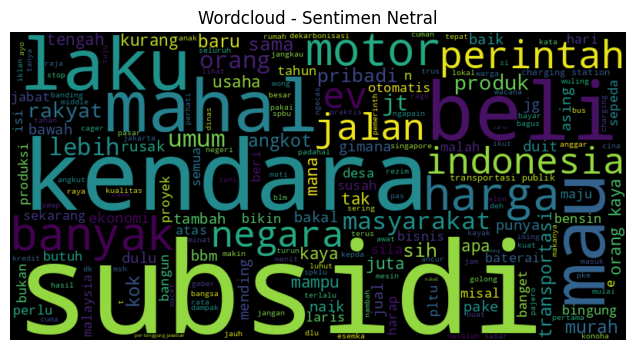

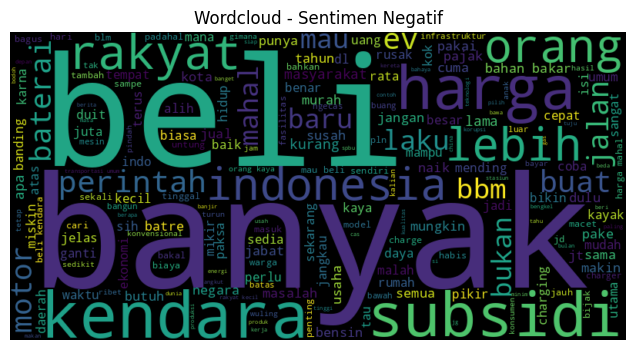

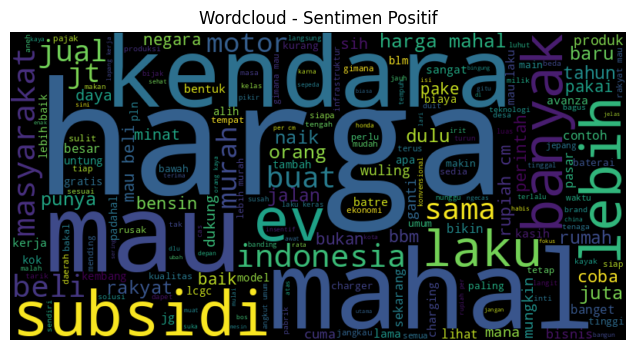

In [94]:
# Mengganti nilai NaN dengan string kosong ('') pada kolom "text_cleaning"
df['text_cleaning'] = df['text_cleaning'].fillna('')

# Membuat subset data untuk tiap kategori sentimen
df_neutral = df[df['sentimen'] == 'netral']
df_negative = df[df['sentimen'] == 'negatif']
df_positive = df[df['sentimen'] == 'positif']

# Menggabungkan semua kata dalam kolom "text_cleaning" untuk tiap kategori sentimen
text_neutral = ' '.join(df_neutral['text_cleaning'])
text_negative = ' '.join(df_negative['text_cleaning'])
text_positive = ' '.join(df_positive['text_cleaning'])

# Membuat objek WordCloud untuk tiap kategori sentimen
wordcloud_neutral = WordCloud(width=800, height=400).generate(text_neutral)
wordcloud_negative = WordCloud(width=800, height=400).generate(text_negative)
wordcloud_positive = WordCloud(width=800, height=400).generate(text_positive)

# Menampilkan wordcloud untuk tiap kategori sentimen secara terpisah
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Netral')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Negatif')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Positif')
plt.axis('off')
plt.show()

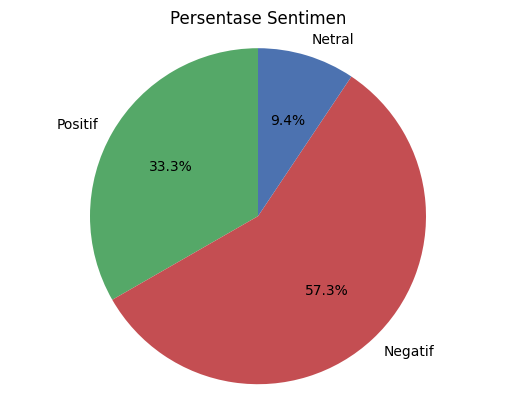

In [95]:
# Menghitung jumlah sentimen positif, negatif, dan netral
positif_count = df[df['sentimen'] == 'positif'].shape[0]
negatif_count = df[df['sentimen'] == 'negatif'].shape[0]
netral_count = df[df['sentimen'] == 'netral'].shape[0]

# Menyusun data sentimen dan label
sentimen = [positif_count, negatif_count, netral_count]
labels = ['Positif', 'Negatif', 'Netral']

# Menentukan warna untuk setiap sektor
colors = ['#55a868', '#c44e52', '#4c72b0']

# Membuat Pie Chart
plt.pie(sentimen, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menambahkan judul
plt.title('Persentase Sentimen')

# Menampilkan Pie Chart
plt.axis('equal')
plt.show()